In [1]:
import tweetnlp
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("data_small.csv")
df.dt = pd.to_datetime(df.dt)
df.user_created = pd.to_datetime(df.user_created)
df.head()

,text,dt,replyCount,retweetCount,likeCount,quoteCount,viewCount,user_created,user_followers,user_following,user_tweets,user_verified,user_blue
0,@VivekGRamaswamy Biden is backing them?,2024-10-02 00:38:42,205,349,5043,18,216908,2009-06-02 20:12:29+00:00,202752698,796,56345,False,True
1,@BillAckman @POTUS @KamalaHarris @DNC One can ...,2024-10-04 01:44:44,207,719,4343,16,130881,2009-06-02 20:12:29+00:00,202754455,796,56350,False,True
2,@atensnut @BillAckman @POTUS @KamalaHarris @DN...,2024-10-04 02:25:35,57,97,1176,9,17669,2009-06-02 20:12:29+00:00,202747214,796,56373,False,True
3,@Raymond26773481 @BillAckman @POTUS @KamalaHar...,2024-10-04 02:26:51,30,36,417,5,9640,2009-06-02 20:12:29+00:00,202753975,796,56350,False,True
4,@glennbeck GOP led House controls FEMA spendin...,2024-10-04 05:54:41,0,1,0,0,22,2021-06-27 11:50:26+00:00,519,37,156113,False,False


In [3]:
model = tweetnlp.load_model('topic_classification') 

/home/ubuntu/code/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py:367: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map

In [4]:
model.topic("Jacob Collier is a Grammy-awarded English artist from London.", return_probability=True)

{'label': ['celebrity_&_pop_culture', 'music'],
 'probability': {'arts_&_culture': 0.037371598184108734,
  'business_&_entrepreneurs': 0.010188558138906956,
  'celebrity_&_pop_culture': 0.92448890209198,
  'diaries_&_daily_life': 0.034257110208272934,
  'family': 0.00796138122677803,
  'fashion_&_style': 0.020642081275582314,
  'film_tv_&_video': 0.08062583208084106,
  'fitness_&_health': 0.006343101151287556,
  'food_&_dining': 0.004288368858397007,
  'gaming': 0.004327300935983658,
  'learning_&_educational': 0.010652038268744946,
  'music': 0.8291945457458496,
  'news_&_social_concern': 0.24688148498535156,
  'other_hobbies': 0.02067115530371666,
  'relationships': 0.020371070131659508,
  'science_&_technology': 0.017007488757371902,
  'sports': 0.014291086234152317,
  'travel_&_adventure': 0.01042388565838337,
  'youth_&_student_life': 0.00860515981912613}}

In [ ]:
# reversed
result = []
for x in tqdm(df['text'].values):
    result.append(model.topic(x, return_probability=True))

  0%|          | 0/932159 [00:00<?, ?it/s]

In [ ]:
result_df = pd.json_normalize(result)
result_df.to_csv('data_topic.csv', index=False)
result_df.head()

In [13]:
result_df.head()

,label,probability.arts_&_culture,probability.business_&_entrepreneurs,probability.celebrity_&_pop_culture,probability.diaries_&_daily_life,probability.family,probability.fashion_&_style,probability.film_tv_&_video,probability.fitness_&_health,probability.food_&_dining,probability.gaming,probability.learning_&_educational,probability.music,probability.news_&_social_concern,probability.other_hobbies,probability.relationships,probability.science_&_technology,probability.sports,probability.travel_&_adventure,probability.youth_&_student_life
0,[news_&_social_concern],0.011159,0.009933,0.070961,0.063801,0.005478,0.002394,0.039792,0.007803,0.001997,0.004719,0.005994,0.006091,0.972211,0.013591,0.006541,0.008451,0.009159,0.003893,0.003915
1,[news_&_social_concern],0.005537,0.015466,0.033497,0.035028,0.005107,0.002583,0.012882,0.010600,0.002455,0.004638,0.005681,0.008106,0.976725,0.007746,0.004573,0.008580,0.014608,0.005584,0.004213
2,[news_&_social_concern],0.006440,0.009505,0.078573,0.041924,0.005678,0.002838,0.017515,0.009420,0.002395,0.004253,0.005437,0.011606,0.978440,0.008363,0.005755,0.010036,0.010403,0.004701,0.004177
3,[news_&_social_concern],0.005416,0.009111,0.124436,0.054204,0.006638,0.002914,0.012381,0.006476,0.001880,0.004696,0.003357,0.009679,0.961034,0.009231,0.007970,0.006701,0.040805,0.005080,0.003070
4,[news_&_social_concern],0.006213,0.030397,0.041811,0.030096,0.005773,0.003551,0.018017,0.015679,0.003694,0.007209,0.013618,0.008561,0.985160,0.010405,0.005113,0.128251,0.011709,0.006966,0.009524


<Axes: >

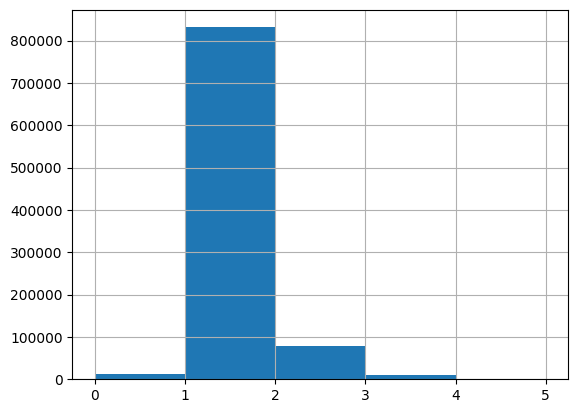

In [25]:
result_df.label.str.len().hist(bins='auto')

In [28]:
result_df.label.apply(lambda x: "news_&_social_concern" in x).mean()

np.float64(0.9327325059351462)

In [53]:
from matplotlib import pyplot as plt

In [54]:
p = result_df.iloc[:, result_df.columns != "label"].round().mean().sort_values().plot.barh()
p.set_xlim(0.0, 1.0)
plt.title("Fraction of tweets with found topic")
plt.plot();

<IPython.core.display.Javascript object>